In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

(639, 2)
(1731, 2)


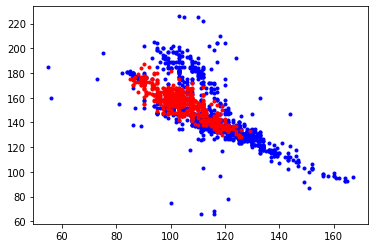

In [ ]:

[X_train, y_train, X_test, y_test] = np.load("TP3.npy",allow_pickle=True)
#Pixel peau
T_train = X_train[np.where(y_train==1),:]
T_train = np.reshape(T_train,(T_train.shape[1],T_train.shape[2] ))
#Pixel non peau
F_train = X_train[np.where(y_train==0),:]
F_train = np.reshape(F_train,(F_train.shape[1],F_train.shape[2] ))
plt.plot(F_train[:,0], F_train[:,1], '.b')
plt.show
plt.plot(T_train[:,0], T_train[:,1], '.r')
plt.show
print(np.shape(T_train))
print(np.shape(F_train))

In [ ]:
def norm1(x, m, s):
  p = (1/(math.sqrt(2*math.pi)*s)) * math.exp( -(x-m)*(x-m) / (2*s*s) )
  return p

In [ ]:
mCb = np.mean( T_train[:,0] )
mCr = np.mean( T_train[:,1] )

sCb = np.std( T_train[:,0] )
sCr = np.std( T_train[:,1] )

print(mCb)
print(mCr)
print(sCb)
print(sCr)

104.29577464788733
155.19405320813772
9.067914388009926
11.607693835769547


0.0004021648006133216
0.0005012137514720641


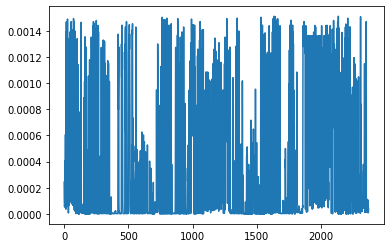

In [ ]:
p1_train = [norm1(X[0], mCb, sCb) * norm1(X[1], mCr, sCr) for X in X_train]
p1_train_mean = np.mean(p1_train)
p1_train_std = np.std(p1_train)
print(p1_train_mean)
print(p1_train_std)

plt.plot(p1_train)

0.0004021648006133216
0.0005012137514720641


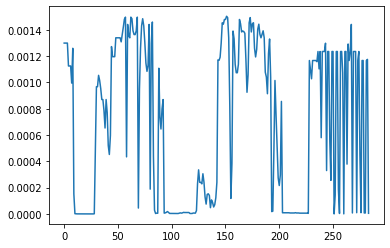

In [ ]:
p1_test = [norm1(X[0], mCb, sCb) * norm1(X[1], mCr, sCr) for X in X_test]
p1_test_mean = np.mean(p1_train)
p1_test_std = np.std(p1_train)
print(p1_test_mean)
print(p1_test_std)

plt.plot(p1_test)

In [ ]:
T_train = X_train[np.where(y_train==1),:]
TP = len(np.where(np.logical_and(p1_test > p1_train_mean,y_test==1))[0] )
FP = len(np.where(np.logical_and(p1_test < p1_train_mean,y_test==1))[0] )
TN = len(np.where(np.logical_and(p1_test < p1_train_mean,y_test==0))[0] )
FN = len(np.where(np.logical_and(p1_test > p1_train_mean,y_test==0))[0] )
sens = TP/(TP+FN)
spec = TN/(FP+TN)
print("TP = ", TP)
print("FP = ", FP)
print("TN = ", TN)
print("FN = ", FN)
print("sensibilité = ",sens)
print("specificité = ",spec)

TP =  102
FP =  2
TN =  120
FN =  60
sensibilité =  0.6296296296296297
specificité =  0.9836065573770492


In [ ]:
def get_spec1(seuil):
  p_test = [norm1(X[0], mCb, sCb) * norm1(X[1], mCr, sCr) for X in X_test]
  TP = len(np.where(np.logical_and(p_test > seuil,y_test==1))[0] )
  FN = len(np.where(np.logical_and(p_test < seuil,y_test==1))[0] )
  FP = len(np.where(np.logical_and(p_test > seuil,y_test==0))[0] )
  TN = len(np.where(np.logical_and(p_test < seuil,y_test==0))[0] )
  sens = TP/(TP+FN)
  spec = TN/(FP+TN)
  return [sens, spec]

In [ ]:
NB = 20
step = (np.max(p1_train) - np.min(p1_train) ) / NB
SEUILS = np.arange (np.min(p1_train), np.max(p1_train), step)
spec1 = np.array([get_spec1(seuil) for seuil in SEUILS])

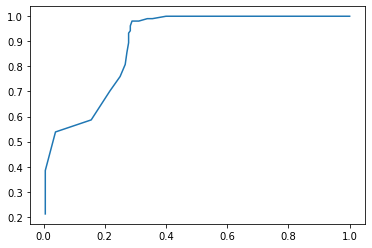

In [ ]:
plt.plot(1 - spec1[:,1], spec1[:,0])

In [ ]:
def norm2(x, m, cov):
  a = np.dot(np.transpose((x-m)), np.linalg.inv(cov))
  a = np.dot(a, (x-m))
  p = 1/(math.sqrt(2*math.pi*np.linalg.det(cov)))*math.exp(-0.5*a)
  return p

In [ ]:
def get_spec2(X,m,s,seuil):
  p_test = [norm2(X, m, s) for X in X_test]
  print(p_test)
  TP = len(np.where(np.logical_and(p_test > seuil,y_test==1))[0] )
  FN = len(np.where(np.logical_and(p_test < seuil,y_test==1))[0] )
  FP = len(np.where(np.logical_and(p_test > seuil,y_test==0))[0] )
  TN = len(np.where(np.logical_and(p_test < seuil,y_test==0))[0] )
  sens = TP/(TP+FN)
  spec = TN/(FP+TN)
  return [sens, spec]

In [ ]:
from sklearn.covariance import EmpiricalCovariance
covCb  = np.array(EmpiricalCovariance().fit(X_train).covariance_)
print(covCb)

[[ 188.045646   -216.93354217]
 [-216.93354217  385.84219071]]


In [ ]:
spec2 = np.array([get_spec2(X_test,mCb,covCb,seuil) for seuil in SEUILS])

[1.1768946469071519e-07, 1.1768946469071519e-07, 1.1768946469071519e-07, 1.1768946469071519e-07, 1.8428459528171294e-07, 1.8428459528171294e-07, 1.8428459528171294e-07, 4.058014684103067e-06, 7.728922279902772e-07, 3.7650370824579765e-12, 6.000238521283924e-17, 1.5171847691713792e-17, 1.82523874505697e-18, 2.0182217729773526e-18, 9.828374624184815e-19, 1.0820264465643007e-18, 2.760535766896342e-19, 2.760535766896342e-19, 6.257210585512805e-19, 6.257210585512805e-19, 6.257210585512805e-19, 1.3969978526342332e-18, 3.072120738619109e-18, 2.855713410977732e-18, 6.257210585512805e-19, 1.3969978526342332e-18, 7.072447945549988e-18, 2.6678538565166218e-17, 2.9918829771710443e-16, 6.690255053531095e-12, 4.4374550817234485e-10, 2.950402638688783e-07, 4.381151124421102e-09, 1.584246724213116e-08, 3.597190055317416e-08, 7.930330592101453e-08, 7.930330592101453e-08, 4.829164719851855e-08, 1.1276338485317792e-08, 7.930330592101453e-08, 1.2699056386563132e-08, 1.91689769269379e-11, 3.908947143387645

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


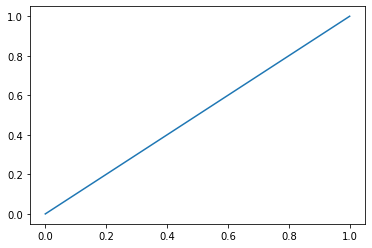

In [ ]:
plt.plot(1 - spec2[:,1], spec2[:,0])
print(spec2)